Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

In [1]:
airbnb<-read.csv('airbnb-listings.csv',sep = ';')
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

In [2]:
head(airbnb)

,ID,Listing.Url,Scrape.ID,Last.Scraped,Name,Summary,Space,Description,Experiences.Offered,Neighborhood.Overview,⋯,Review.Scores.Communication,Review.Scores.Location,Review.Scores.Value,License,Jurisdiction.Names,Cancellation.Policy,Calculated.host.listings.count,Reviews.per.Month,Geolocation,Features
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>
1,15141125,https://www.airbnb.com/rooms/15141125,"2,01704E+13",08/04/2017,Panoramic charming studio!,"Charming bright and cosy studio in ""El Rastro"" Located in the historic city center in one of the most gastronomic areas of madrid within walking distance to the most important touristic attractions.","It's a bright and cosy studio located in the heart of ""El Rastro"", one of the most central and charming areas of Madrid. The studio has a panoramic stunning view. It's equipped with a comfy double bed, a folding single bed, tv, dvd, all the kitchen facilities, as well as a well appointed bathroom.","Charming bright and cosy studio in ""El Rastro"" Located in the historic city center in one of the most gastronomic areas of madrid within walking distance to the most important touristic attractions. It's a bright and cosy studio located in the heart of ""El Rastro"", one of the most central and charming areas of Madrid. The studio has a panoramic stunning view. It's equipped with a comfy double bed, a folding single bed, tv, dvd, all the kitchen facilities, as well as a well appointed bathroom. The full studio will be entirely to the guests. The building has a lift so you don't have to carry your luggage any more :) I am delighted to preform the check in at the apartment upon an agreed time, and explain all the apartment details and give you a local insight about Madrid :) During the stay I am always available to assist in anything you may require :) You can always contact via whattsapp, phone and airbnb. The studio is located in the remarkable neighbourhood of La latina, Madrid city ce",none,"The studio is located in the remarkable neighbourhood of La latina, Madrid city center, in the heart of El Rastro street market that happens every Sunday and bank holidays. If you are in Madrid you should not miss this event!",⋯,10,10,10,,,moderate,2,5.11,"40.40745268477803,-3.7079954754432634","Host Is Superhost,Host Has Profile Pic,Host Identity Verified,Requires License,Instant Bookable"
2,9470166,https://www.airbnb.com/rooms/9470166,"2,01704E+13",08/04/2017,Comfortable penthouse in the center,"In the center, recently remodeled, comfortable, modern, very bright, very quiet and fully equipped. 10min walk to Plaza Mayor, Thyssen Museum, Atocha train station and 15 to the Prado Museum. Metro 2min away.Great bed, Wifi,stereo,flat TV..",Quiet and comfortable space where you can relax during your stay in out city,"In the center, recently remodeled, comfortable, modern, very bright, very quiet and fully equipped. 10min walk to Plaza Mayor, Thyssen Museum, Atocha train station and 15 to the Prado Museum. Metro 2min away.Great bed, Wifi,stereo,flat TV.. Quiet and comfortable space where you can relax during your stay in out city You will be alone, while you are in my flat and you can use everything you have there If you have any questions while you are in the flat or any suggestions just tell me I will always help you! It belongs to the district center of Madrid where you can find several museums , ancient Jewish of Madrid, and taverns where you can have quiet drinks The nearest Metro station is Tirso de Molina , its just 300m from my flat The Puerta del Sol and Plaza Mayor are just 10 minutes walking The apartment is very central and can move to any part of the downtown walking.",none,"It belongs to the district center of Madrid where you can find several museums , ancient Jewish of Madrid, and taverns where you can have quiet drinks",⋯,9,9,8,,,strict,13,5.88,"40.40831556101927,-3.705006385704201","Host Has Profile Pic,Host Ide

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [4]:
airbnb1<-airbnb[,c('City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')]
airbnb1$Square.Meters<-airbnb1$Square.Feet*0.092903


Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [7]:
library(tidyverse)

airbnb1 %>% filter(City=="Madrid" & Room.Type=="Entire home/apt" & Neighbourhood != "")->df_madrid1
df_madrid1 %>% select(-c('Room.Type','City'))->df_madrid


set.seed(123)

Crea una nueva columna llamada Square.Meters a partir de Square.Feet. Recuerda que un pie cuadrado son 0.092903 metros cuadrados.

In [8]:
df_madrid$Square.Meters <- df_madrid$Square.Feet*0.092903

¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [38]:
porcentaje <-(sum(is.na(df_madrid$Square.Meters)) / nrow(df_madrid))*100
print(porcentaje)

[1] 93.80468


De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [21]:
paste("El porcentaje de 0s es: ",sum(df_madrid$Square.Meters==0,na.rm=T)/sum(!is.na(df_madrid$Square.Meters))*100,"%")


[1] "El porcentaje de 0s es:  36.8876080691643 %"

Reemplazar todos los 0m^2 por NA 

In [23]:
airbnb1 <- airbnb1 %>% mutate(Square.Meters = ifelse(Square.Meters==0, NA, Square.Meters))

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA. Pero **antes de crear el modelo** vamos a hacer:
* pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.
* crearemos una variable sintética nueva basada en la similitud entre barrios que usaremos en nuestro modelo.

Pinta el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

In [25]:
airbnb1 <- airbnb1 %>% mutate(Square.Meters = ifelse(Square.Meters< 20, NA, Square.Meters))

Existen varios Barrios que todas sus entradas de Square.Meters son NA, vamos a eliminar del dataset todos los pisos que pertenecen a estos barrios.

In [30]:
barriona <- airbnb1 %>% group_by(Neighbourhood) %>% 
  summarise(num_na=sum(is.na(Square.Meters))/length(Square.Meters)) %>% 
  filter(num_na==1) %>% select(Neighbourhood)

In [31]:
dim(airbnb1[,c("Neighbourhood","Square.Meters")])
unique(na.omit(airbnb1[,c("Neighbourhood","Square.Meters")])$Neighbourhood)

[1] 14780     2

[1] "La Latina"                         "Acacias"                          
 [3] "Malasaña"                          "Recoletos"                        
 [5] "Argüelles"                         "Embajadores"                      
 [7] "Dreta de l'Eixample"               "Justicia"                         
 [9] "Sol"                               "Lista"                            
[11] "Carabanchel"                       "Palos do Moguer"                  
[13] ""                                  "Friedrichshain"                   
[15] "Trafalgar"                         "Fuente del Berro"                 
[17] "Riverbend"                         "San Blas"                         
[19] "Almenara"                          "Imperial"                         
[21] "Parione"                           "Palacio"                          
[23] "Arapiles"                          "Usera"                            
[25] "Madeleine - Vendôme"               "Puente de Vallecas"               
[27] "Pacifico"                          "Harlem"                           
[29] "Cuatro Caminos"                    "Agios Nikolaos"                   
[31] "Cortes"                            "Almagro"                          
[33] "Fuencarral-El Pardo"               "Aluche"                           
[35] "Retiro"                            "Goya"                             
[37] "Saint-Michel"                      "Wilmersdorf"                      
[39] "Castilla"                          "Guindalera"                       
[41] "Gaztambide"                        "Rios Rosas"                       
[43] "Valdeacederas"                     "Castellana"                       
[45] "Fuencarral-el Pardo"               "Adelfas"                          
[47] "Sant Antoni"                       "El Tréntaiseis"                   
[49] "Ciudad Lineal"                     "Barajas"                          
[51] "Nieuwmarkt en Lastage"             "El Viso"                          
[53] "Ciudad Jardin"                     "Chamberí"                         
[55] "Châtelet - Les Halles - Beaubourg" "Neukölln"                         
[57] "Centro"                            "Jerónimos"                        
[59] "Le Marais"                         "Monteverde Vecchio"               
[61] "Regola"                            "Gare de Lyon"                     
[63] "Moratalaz"                         "Vicálvaro"

In [34]:
barriona <- airbnb1 %>% group_by(Neighbourhood) %>% 
  summarise(num_na=sum(is.na(Square.Meters))/length(Square.Meters)) %>% 
  filter(num_na==1) %>% select(Neighbourhood)
airbnb1 <- airbnb1[!airbnb1$Neighbourhood %in% barriona$Neighbourhood,]
paste("Quedan ",length(unique(df_madrid$Neighbourhood)),"barrios")
dim(airbnb1)

[1] "Quedan  48 barrios"

[1] 13293    15

El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




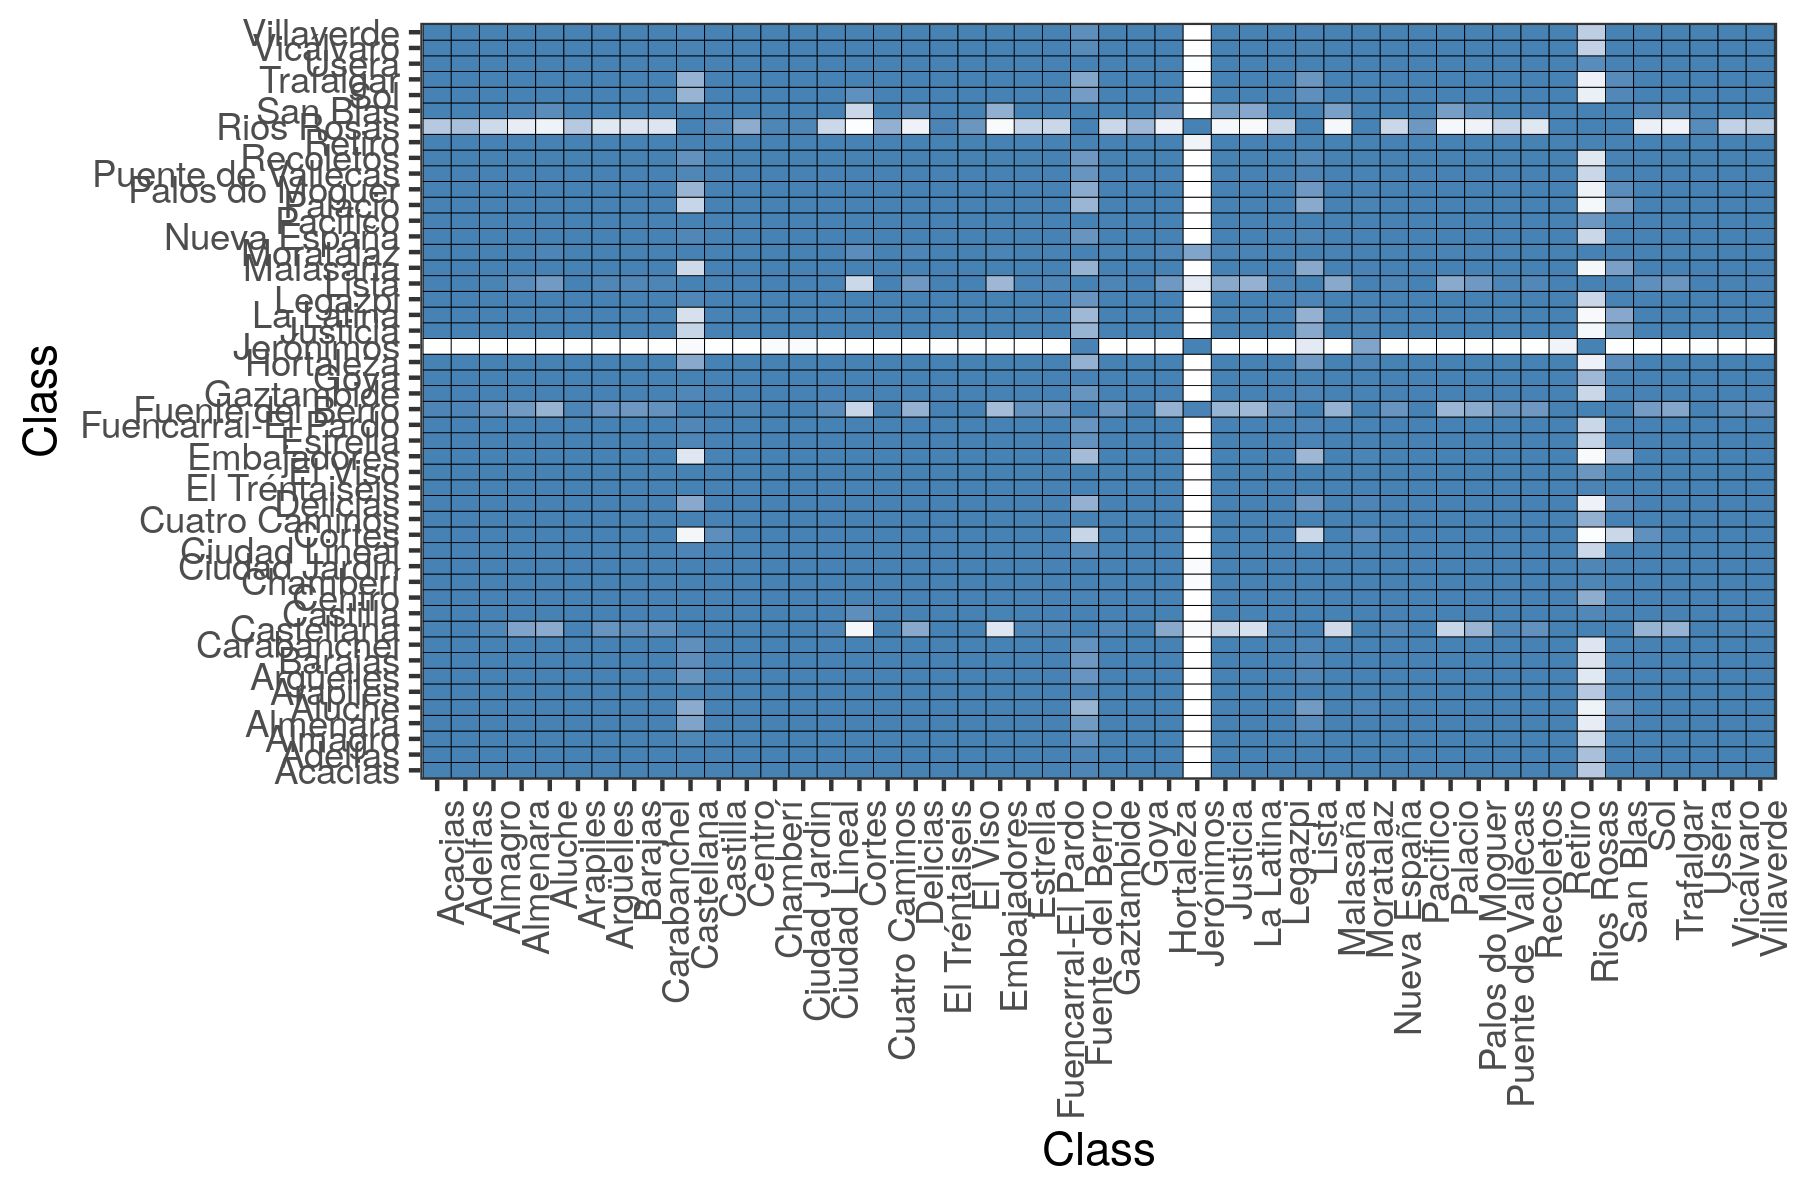

In [35]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


In [36]:
f_dist<-as.dist(1-resm)
hc <- hclust(f_dist,method="complete")
hcd <- as.dendrogram(hc)

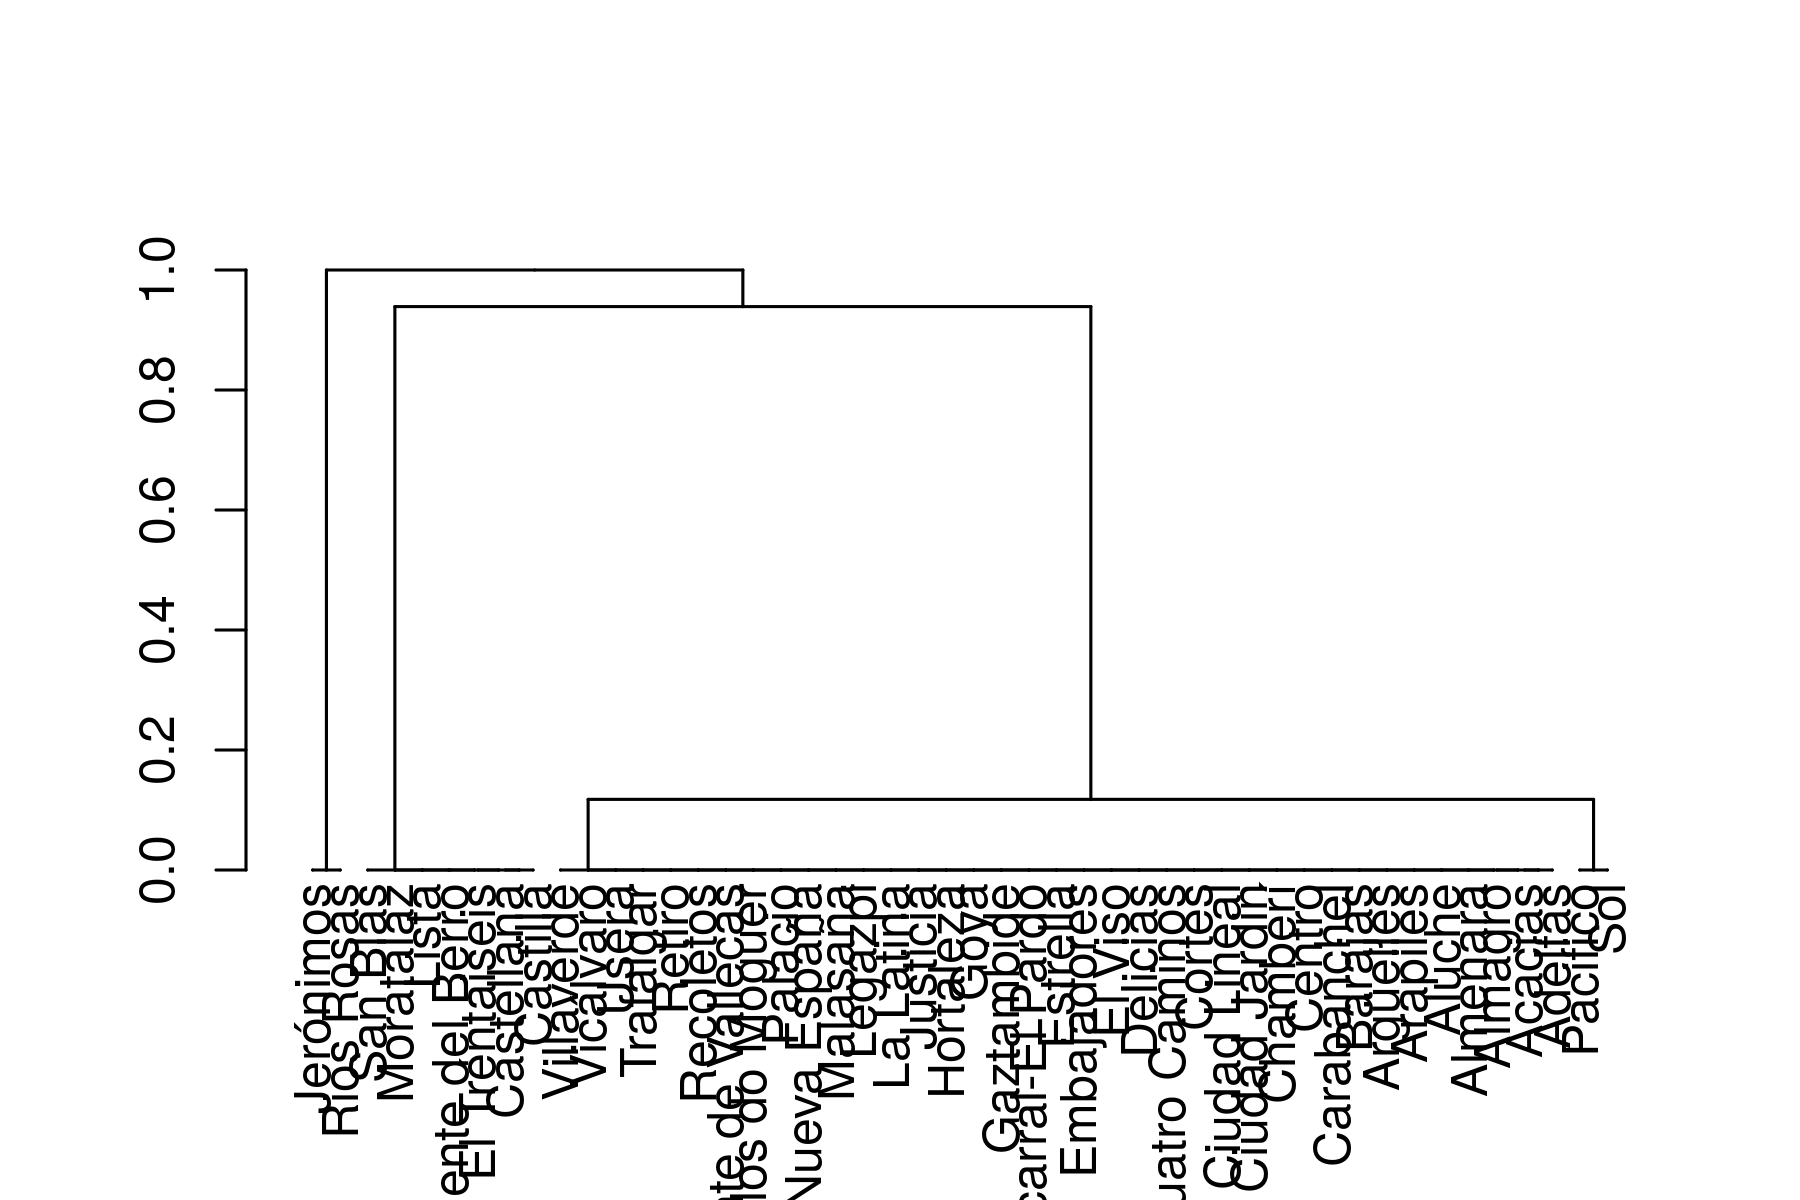

In [37]:
plot(hcd)

¿Que punto de corte sería el aconsejable?, ¿cuantos clusters aparecen?

In [39]:
ct<-cutree(hc,h=0.2)

[1] "Los clusters son bastante buenos"


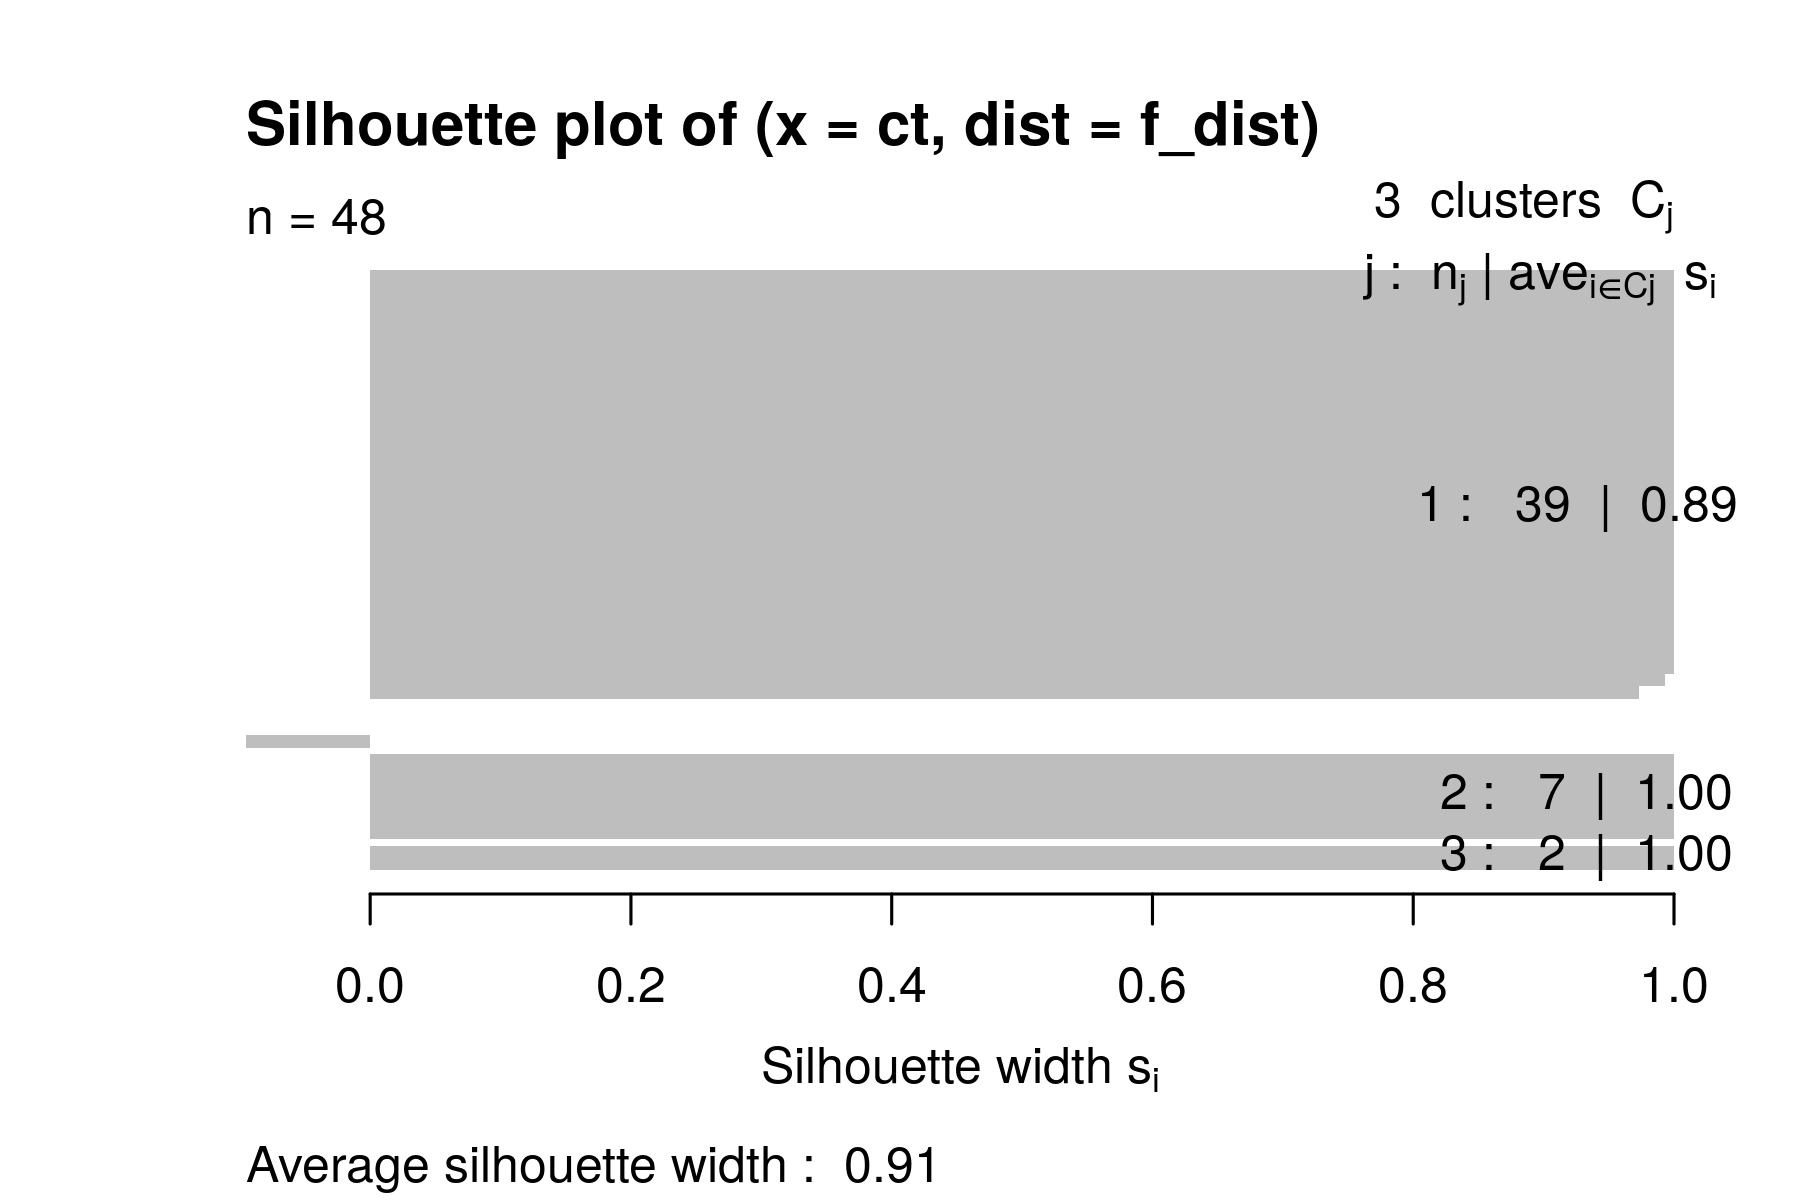

In [41]:

library(cluster)
sil<-silhouette(ct,f_dist)
plot(sil,border=NA)
print("Los clusters son bastante buenos")

Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [42]:
df_barrios<-data.frame(names=names(ct),neighb_id=paste0("Neighb_id_",ct))
head(df_barrios)

,names,neighb_id
,<chr>,<chr>
1,Acacias,Neighb_id_1
2,Adelfas,Neighb_id_1
3,Almagro,Neighb_id_1
4,Almenara,Neighb_id_1
5,Aluche,Neighb_id_1
6,Arapiles,Neighb_id_1


In [43]:
airbnb2<- airbnb1 %>% 
    inner_join(df_barrios,by=c("Neighbourhood"='names')) %>%
    filter(!is.na(Square.Meters))


Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [44]:
set.seed(12)
idx<-sample(1:nrow(airbnb2),nrow(airbnb2)*0.8)
airbnb3<-airbnb2[idx,]
airbnb3<-airbnb2[-idx,]

In [46]:
model<-lm(formula=Square.Meters~neighb_id+neighb_id+Price+Bedrooms, airbnb3)
summary(model)


Call:
lm(formula = Square.Meters ~ neighb_id + neighb_id + Price + 
    Bedrooms, data = airbnb3)

Residuals:
    Min      1Q  Median      3Q     Max 
-50.430 -18.343  -1.102   7.306 123.842 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          38.19189    9.25132   4.128   0.0002 ***
neighb_idNeighb_id_2  0.88288   19.69757   0.045   0.9645    
Price                -0.02754    0.06641  -0.415   0.6808    
Bedrooms             22.15042    4.22785   5.239 6.72e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 32.63 on 37 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.4797,	Adjusted R-squared:  0.4375 
F-statistic: 11.37 on 3 and 37 DF,  p-value: 1.985e-05


In [49]:

caret::postResample(predict(model,airbnb3),obs = airbnb3$Square.Meters)
caret::postResample(predict(model,airbnb3),obs = airbnb3$Square.Meters)

RMSE   Rsquared        MAE 
30.9996612  0.4796751 19.1779516

RMSE   Rsquared        MAE 
30.9996612  0.4796751 19.1779516

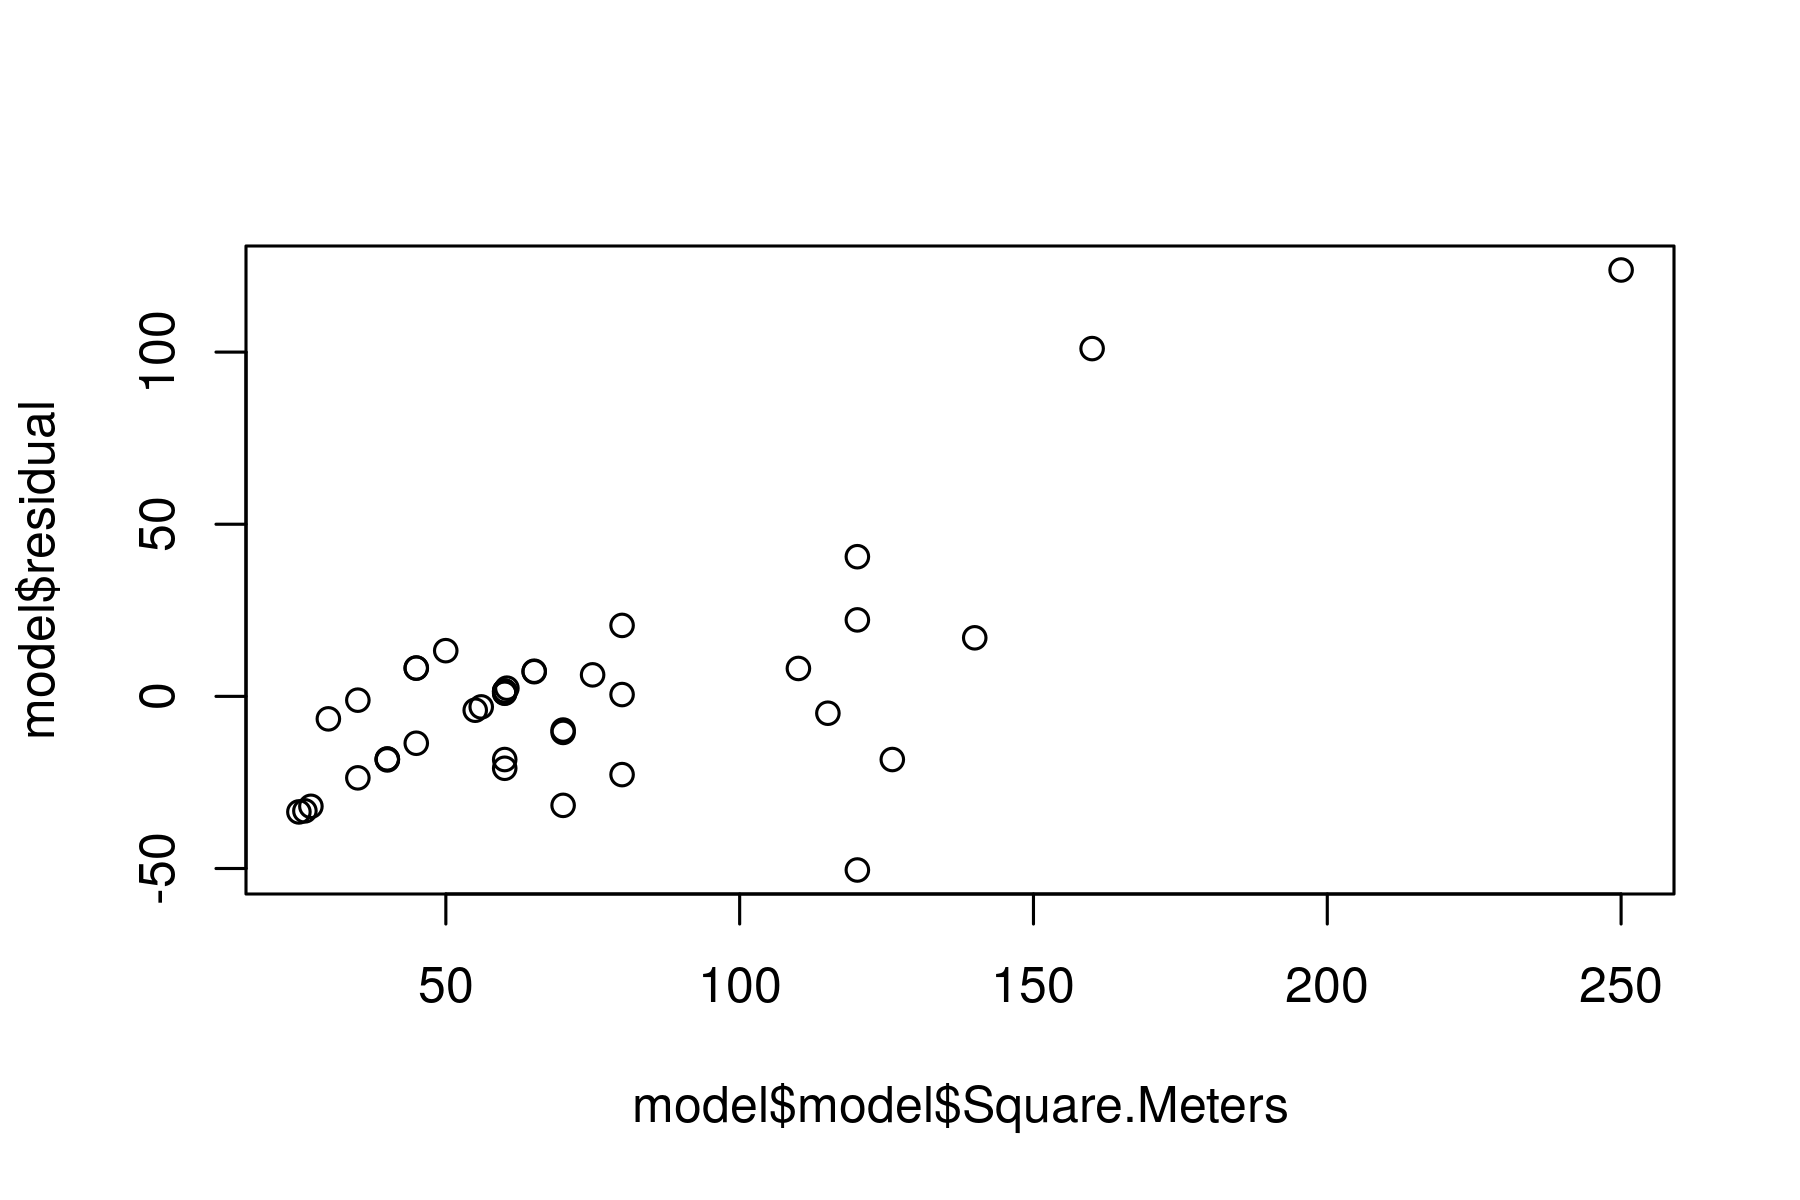

In [50]:
plot(model$model$Square.Meters,model$residual)

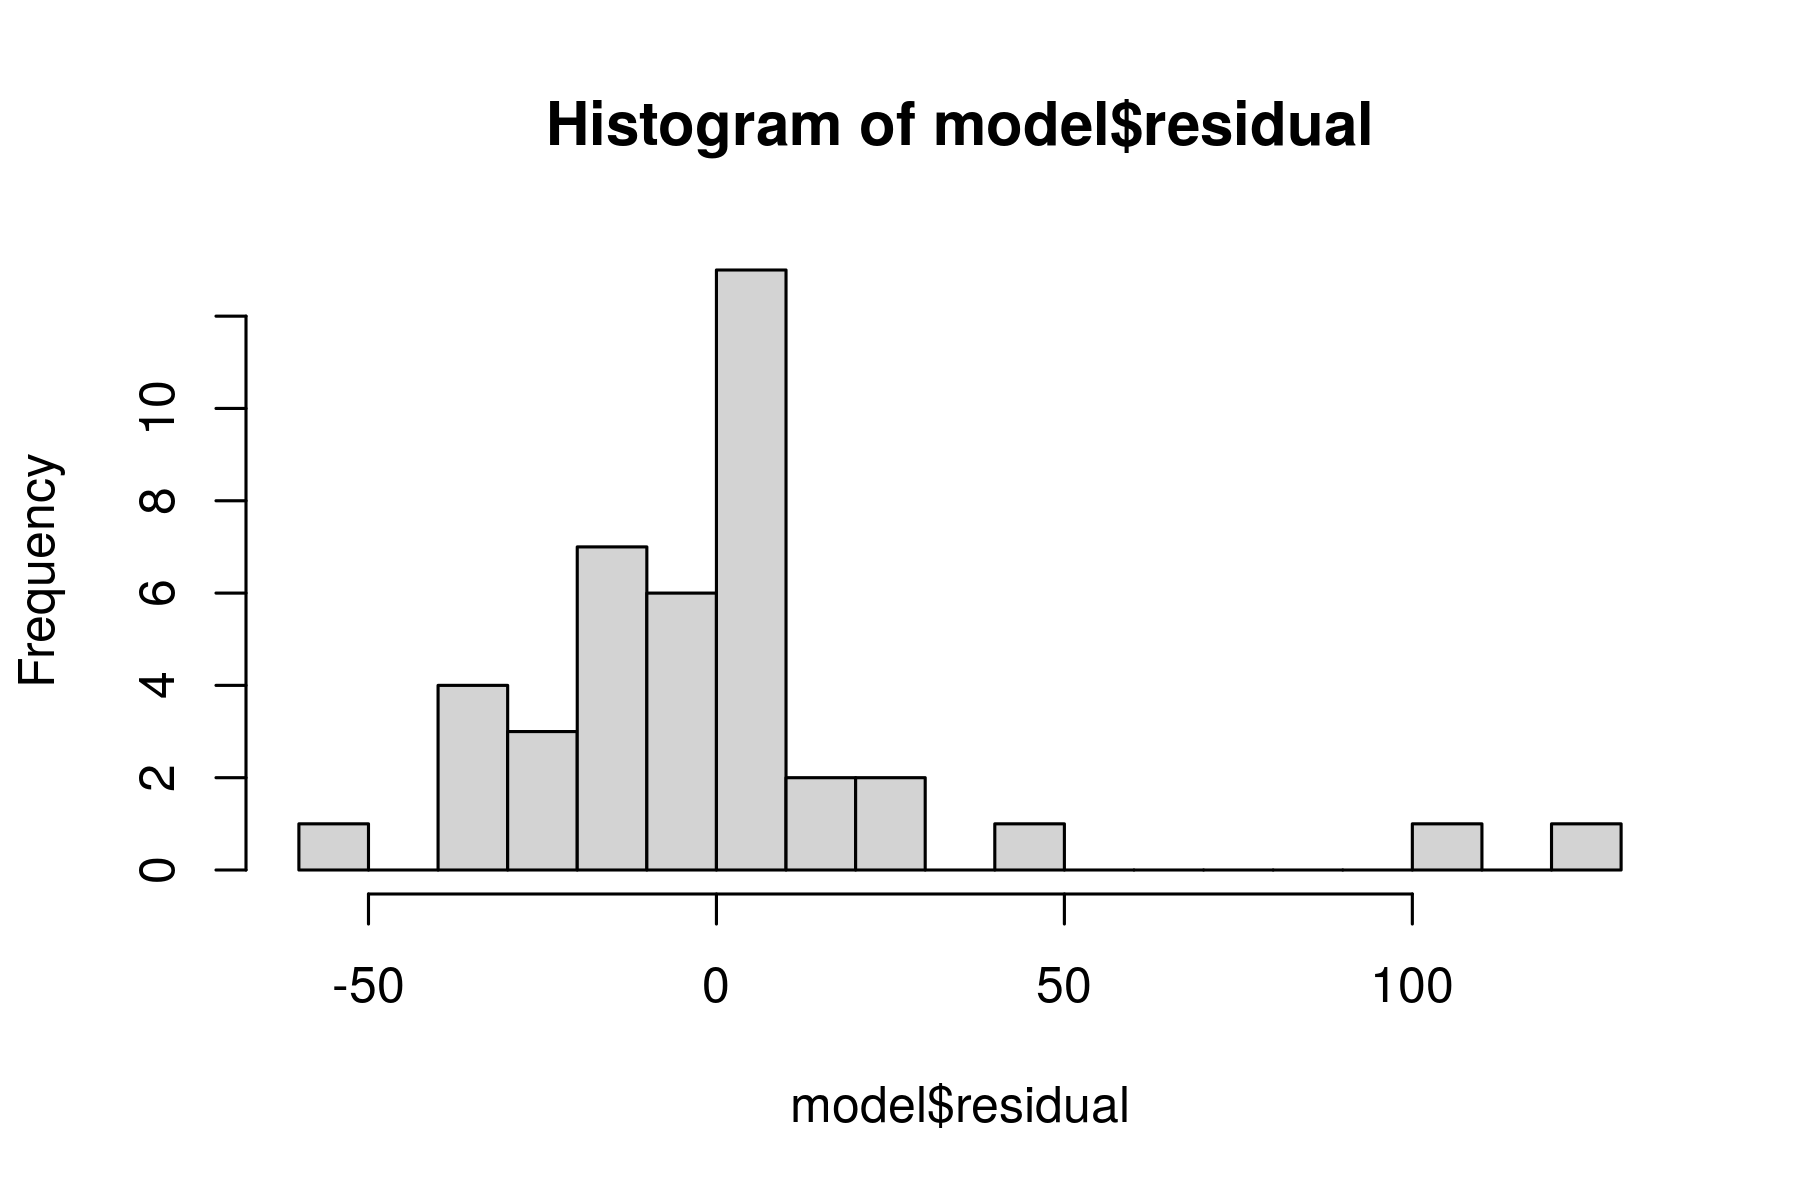

In [51]:
hist(model$residual,breaks=20)

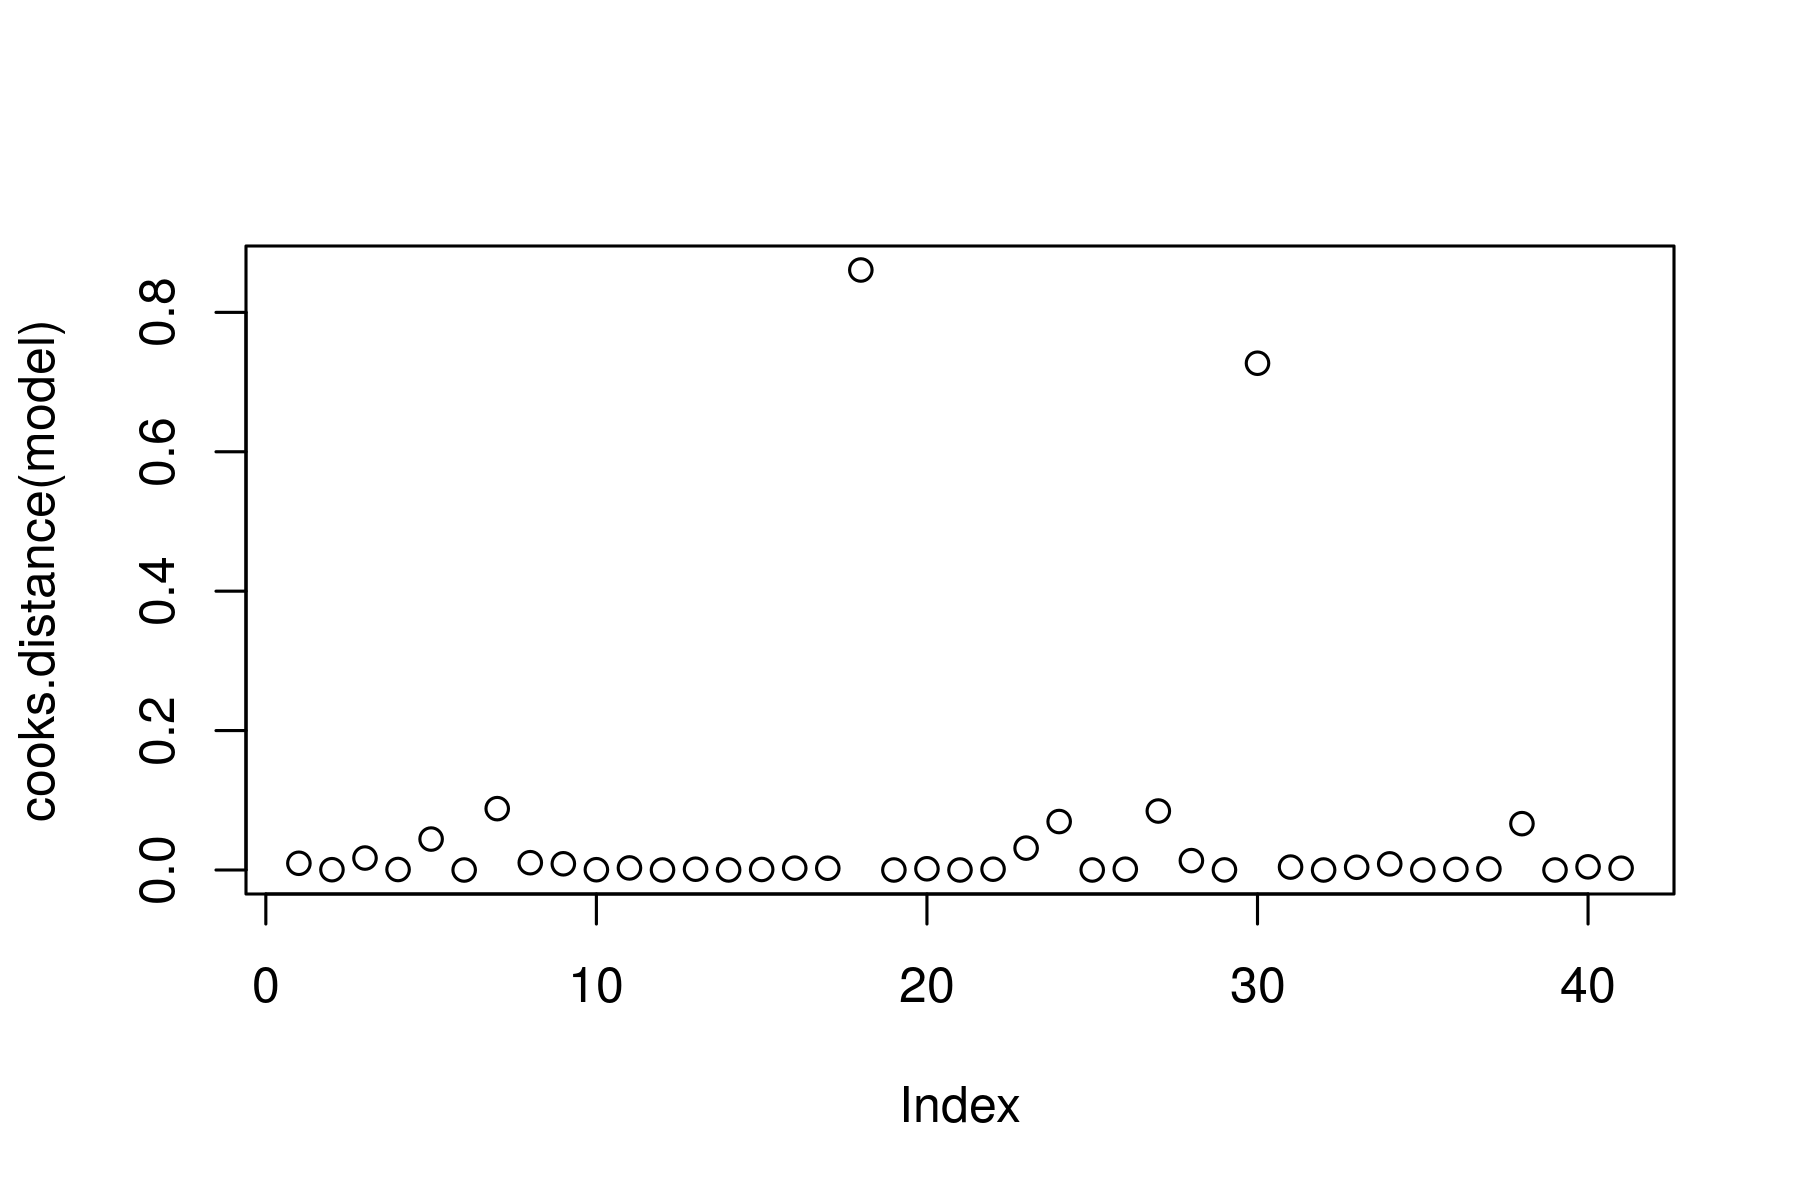

In [53]:
plot(cooks.distance(model))

In [55]:
cook_d<-cooks.distance(model)

airbnb3[names(cook_d),] %>% filter(cook_d>0.2)

City,Room.Type,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<chr>
Madrid,Private room,Almagro,11,3,4,9,23,2691,1,22,89,4.043.329.048.028.240,-36.972.446.309.575.600,250.0020,Neighb_id_1
Madrid,Private room,Trafalgar,9,2,6,9,23,1292,1,22,90,4.042.933.568.387.140,-3.696.680.238.302.630,120.0307,Neighb_id_1


In [56]:
head(cook_d)

9           21           25           26           31           35 
9.646177e-03 4.266900e-04 1.716584e-02 7.143689e-04 4.438288e-02 2.261721e-06

In [59]:
model_cook<-lm(formula=Square.Meters~neighb_id+Price+Bedrooms, airbnb3[names(cook_d),] %>% filter(cook_d<0.2))


In [ ]:
#Comprobamos R^2 para ver si tenemos overfitting

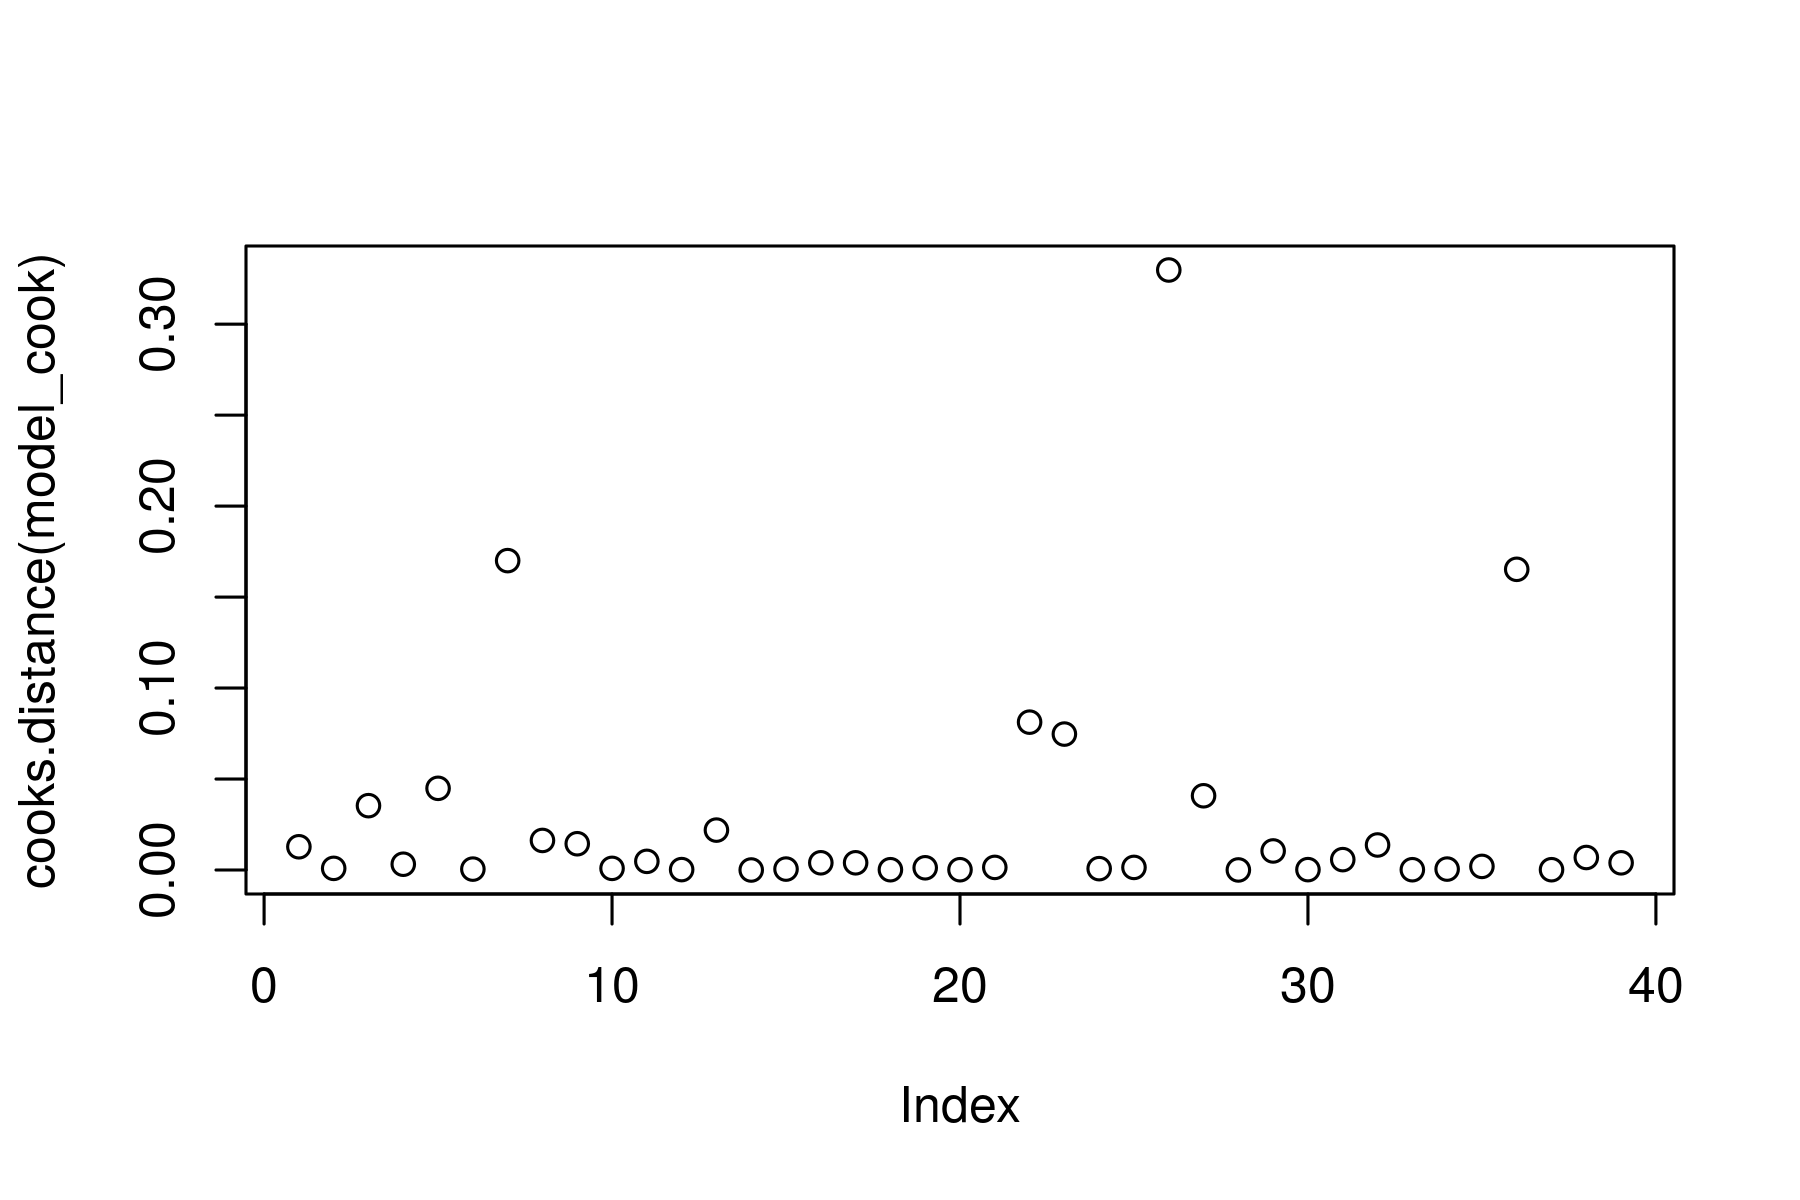

In [61]:
plot(cooks.distance(model_cook))

In [ ]:
plot(model_cook$model$Square.Meters,model_cook$residual)

In [ ]:
#Regularizamos con Ridge
library(glmnet)
over_fit_model<-lm(formula=Square.Meters~neighb_id+Bedrooms+Price*Accommodates, df_madrid_id)
X<-model.matrix(over_fit_model)
y<-as.matrix(over_fit_model$model$Square.Meters,ncols=1)
set.seed(12)
idx<-sample(1:nrow(X),nrow(X)*0.8)
X_train<-X[idx,]
X_test<-X[-idx,]
y_train<-y[idx,]
y_test<-y[-idx,]

cvfit<-cv.glmnet(X_train,y_train,nfolds=10,alpha=0)
cvfit$lambda.1se
cvfit$lambda.min
plot(cvfit)

In [ ]:
gmodel<-glmnet(X,y,alpha=0,lambda = cvfit$lambda.1se)
caret::postResample(predict(gmodel,X_train),obs = y_train)
caret::postResample(predict(gmodel,X_test),obs = y_test)
# Aunque nos sale un R^2 muy bueno si miramos los residuos nos daremos cuenta que nuestro modelo es bastante malo
# a Medida que aumenta el valor de los metros cuadrados el error crece de forma lineal.
plot(y_train,y_train-predict(gmodel,X_train))

A pesar de que nuestro R^2 es elevado y nos podría indicar que nuestro modelo es bueno, si nos fijamos en los residuos observamos que no es tan bueno como pensabamos ya que el error crece de forma lineal.

In [ ]:
#Otorgamos un nivel menor a lamba para ver que sucede
gmodel<-glmnet(X,y,alpha=0,lambda = cvfit$lambda.min)
caret::postResample(predict(gmodel,X_train),obs = y_train)
caret::postResample(predict(gmodel,X_test),obs = y_test)
plot(y_train,y_train-predict(gmodel,X_train))
hist(y_train-predict(gmodel,X_train),breaks=20)

Tras realizar ambos test dicidimos quedarnos con el primero porque es más sencillo.

Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

In [ ]:

df_madrid_id_test$pred<-model %>% predict(df_madrid_id_test)
hist(df_madrid_id_test$Square.Meters-df_madrid_id_test$pred,breaks=15)

In [ ]:
#No tenemos ninguna tendencia y al tener pocos datos es dificl predecir muchas cosas.
plot(df_madrid_id_test$pred,df_madrid_id_test$Square.Meters-df_madrid_id_test$pred)


In [ ]:

library(caret)
postResample(df_madrid_id_test$pred,obs = df_madrid_id_test$Square.Meters)

In [ ]:
hist(df_madrid_id_test$pred)
hist(df_madrid_id_test$Square.Meters)

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates), con 1 baño, con un precio de 80€/noche y 3 habitaciones en el barrio de Sol, con 3 camas y un review de 80.
¿Cuantos metros cuadrados tendría? Si tu modelo necesita algúna variable adicional puedes inventartela dentro del rango de valores del dataset.
¿Como varía sus metros cuadrados con cada habitación adicional?

In [ ]:
# Primero buscamos el neighb_id del barrio de Sol:
neighb_id_sol<-df_barrios %>% filter(names=="Sol") %>% select(neighb_id)
paste0("El id de barrio es:",neighb_id_sol)
# Luego creamos el dataframe:
df_appartment<-data.frame(neighb_id=neighb_id_sol,Bedrooms=3,Price=80,Accommodates=6)
# Por último damos la predicción
pred_m2<-predict(model,df_appartment)
paste("Los metros cuadrados son:",round(pred_m2))

Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?